Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Kugasheva Adeliya"
COLLABORATORS = "Kugasheva Adeliya"

---

# Интерполяция при помощи полиномов Лагранжа.

In [2]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        res = 0
        for k in range(len(self.xk)):
          lk = 1
          for i in range(len(self.xk)):
            if i != k:
              lk = lk * (x - self.xk[i]) / (self.xk[k] - self.xk[i])
          lk = lk * self.yk[k]
          res = res + lk
        return res

In [3]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


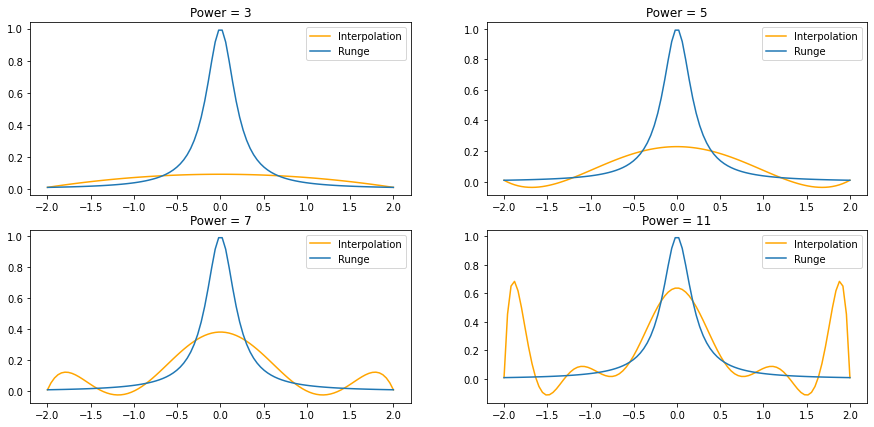

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,7))
k = 1

for i in [4, 6, 8, 12]:
  xx = np.linspace(-2, 2, i)
  yy = runge_func(xx)

  lagr = LagrangeInterpolator(xx, yy)
  xx2 = np.linspace(-2, 2, 100)
  yy2 = [lagr(xval) for xval in xx2]
  yf = runge_func(xx2)

  fig.add_subplot(2, 2, k)
  k += 1
  plt.plot(xx2, yy2, c='orange', label = 'Interpolation')
  plt.plot(xx2, yf, label='Runge')
  plt.legend()
  tit = "Power = " + str(i-1)
  plt.title(tit)

In [5]:
from math import pi, cos
def cheb(a, b, n):
  x = np.zeros(n)
  for i in range(1, n+1):
    x[i-1] = 0.5*(a + b) + 0.5*(b - a)*cos((2*i - 1) * pi / (2*n))
  return x

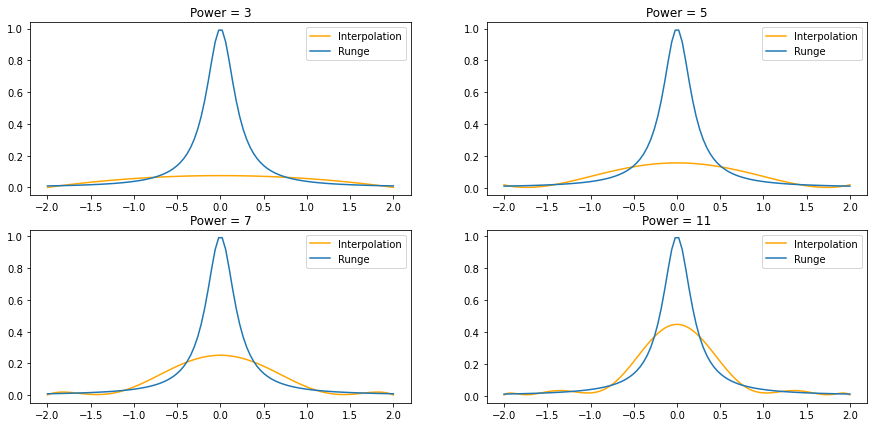

In [6]:
fig = plt.figure(figsize=(15,7))
k = 1

for i in [4, 6, 8, 12]:
  xx = cheb(-2, 2, i)
  yy = runge_func(xx)

  lagr = LagrangeInterpolator(xx, yy)
  xx2 = np.linspace(-2, 2, 100)
  yy2 = [lagr(xval) for xval in xx2]
  yf = runge_func(xx2)

  fig.add_subplot(2, 2, k)
  k += 1
  plt.plot(xx2, yy2, c='orange', label = 'Interpolation')
  plt.plot(xx2, yf, label='Runge')
  plt.legend()
  tit = "Power = " + str(i-1)
  plt.title(tit)